<a href="https://colab.research.google.com/github/ANANYASHAH29/Quantum-Computing/blob/main/TSP_using_QAOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall qiskit qiskit-aer qiskit-optimization -y


In [2]:
!pip install qiskit==0.44.1 qiskit-aer==0.12.2 qiskit-optimization==0.5.0 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.0 MB/s eta 0:00:00


In [3]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import Tsp
from qiskit_optimization.converters import QuadraticProgramToQubo

import networkx as nx
import matplotlib.pyplot as plt


/tmp/ipython-input-3-2969665313.py:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import QAOA


In [4]:
from qiskit_optimization.applications import Tsp
import numpy as np

distance_matrix = np.array([
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
])

# Create Tsp instance by passing distance matrix to constructor
tsp = Tsp(distance_matrix)

# Convert to QuadraticProgram
qp = tsp.to_quadratic_program()

# Then convert to QUBO
from qiskit_optimization.converters import QuadraticProgramToQubo
qubo_converter = QuadraticProgramToQubo(penalty=10000)
qubo_problem = qubo_converter.convert(qp)

Q = qubo_problem.objective.quadratic.to_array()
Q = Q + Q.T - np.diag(np.diag(Q))

print(Q)


[[2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 1.0e+00 0.0e+00 1.0e+00 2.0e+04
  1.5e+01 0.0e+00 1.5e+01 2.0e+04 6.0e+00 0.0e+00 6.0e+00]
 [2.0e+04 2.0e+04 2.0e+04 2.0e+04 1.0e+00 2.0e+04 1.0e+00 0.0e+00 1.5e+01
  2.0e+04 1.5e+01 0.0e+00 6.0e+00 2.0e+04 6.0e+00 0.0e+00]
 [2.0e+04 2.0e+04 2.0e+04 2.0e+04 0.0e+00 1.0e+00 2.0e+04 1.0e+00 0.0e+00
  1.5e+01 2.0e+04 1.5e+01 0.0e+00 6.0e+00 2.0e+04 6.0e+00]
 [2.0e+04 2.0e+04 2.0e+04 2.0e+04 1.0e+00 0.0e+00 1.0e+00 2.0e+04 1.5e+01
  0.0e+00 1.5e+01 2.0e+04 6.0e+00 0.0e+00 6.0e+00 2.0e+04]
 [2.0e+04 1.0e+00 0.0e+00 1.0e+00 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04
  7.0e+00 0.0e+00 7.0e+00 2.0e+04 3.0e+00 0.0e+00 3.0e+00]
 [1.0e+00 2.0e+04 1.0e+00 0.0e+00 2.0e+04 2.0e+04 2.0e+04 2.0e+04 7.0e+00
  2.0e+04 7.0e+00 0.0e+00 3.0e+00 2.0e+04 3.0e+00 0.0e+00]
 [0.0e+00 1.0e+00 2.0e+04 1.0e+00 2.0e+04 2.0e+04 2.0e+04 2.0e+04 0.0e+00
  7.0e+00 2.0e+04 7.0e+00 0.0e+00 3.0e+00 2.0e+04 3.0e+00]
 [1.0e+00 0.0e+00 1.0e+00 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 7.0

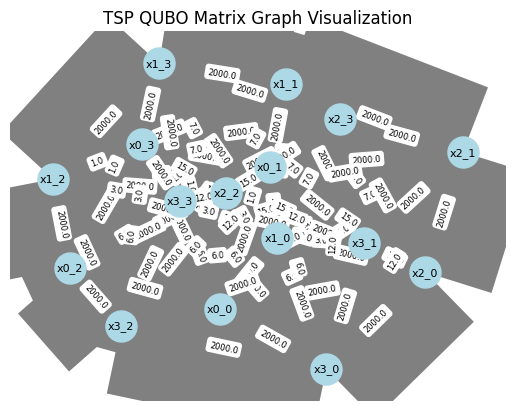

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Q = np.array([
    [2000., 2000., 2000., 2000., 2000., 1., 0., 1., 2000., 15., 0., 15., 2000., 6., 0., 6.],
    [2000., 2000., 2000., 2000., 1., 2000., 1., 0., 15., 2000., 15., 0., 6., 2000., 6., 0.],
    [2000., 2000., 2000., 2000., 0., 1., 2000., 1., 0., 15., 2000., 15., 0., 6., 2000., 6.],
    [2000., 2000., 2000., 2000., 1., 0., 1., 2000., 15., 0., 15., 2000., 6., 0., 6., 2000.],
    [2000., 1., 0., 1., 2000., 2000., 2000., 2000., 2000., 7., 0., 7., 2000., 3., 0., 3.],
    [1., 2000., 1., 0., 2000., 2000., 2000., 2000., 7., 2000., 7., 0., 3., 2000., 3., 0.],
    [0., 1., 2000., 1., 2000., 2000., 2000., 2000., 0., 7., 2000., 7., 0., 3., 2000., 3.],
    [1., 0., 1., 2000., 2000., 2000., 2000., 2000., 7., 0., 7., 2000., 3., 0., 3., 2000.],
    [2000., 15., 0., 15., 2000., 7., 0., 7., 2000., 2000., 2000., 2000., 2000., 12., 0., 12.],
    [15., 2000., 15., 0., 7., 2000., 7., 0., 2000., 2000., 2000., 2000., 12., 2000., 12., 0.],
    [0., 15., 2000., 15., 0., 7., 2000., 7., 2000., 2000., 2000., 2000., 0., 12., 2000., 12.],
    [15., 0., 15., 2000., 7., 0., 7., 2000., 2000., 2000., 2000., 2000., 12., 0., 12., 2000.],
    [2000., 6., 0., 6., 2000., 3., 0., 3., 2000., 12., 0., 12., 2000., 2000., 2000., 2000.],
    [6., 2000., 6., 0., 3., 2000., 3., 0., 12., 2000., 12., 0., 2000., 2000., 2000., 2000.],
    [0., 6., 2000., 6., 0., 3., 2000., 3., 0., 12., 2000., 12., 2000., 2000., 2000., 2000.],
    [6., 0., 6., 2000., 3., 0., 3., 2000., 12., 0., 12., 2000., 2000., 2000., 2000., 2000.]
])

N = 4  # Number of cities

# Create graph
G = nx.Graph()

# Create node labels: 'x{city}_{pos}'
nodes = []
for city in range(N):
    for pos in range(N):
        nodes.append(f'x{city}_{pos}')

G.add_nodes_from(nodes)

# Add edges for non-zero QUBO quadratic terms (ignore diagonal)
for i in range(len(Q)):
    for j in range(i+1, len(Q)):
        if Q[i, j] != 0:
            G.add_edge(nodes[i], nodes[j], weight=Q[i, j])

# Layout - use spring for clarity
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw edges with widths proportional to abs(weight)
edges = G.edges(data=True)
weights = [abs(d['weight']) for (u,v,d) in edges]
nx.draw_networkx_edges(G, pos, width=[w*0.05 for w in weights], edge_color='grey')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edge labels (weights)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("TSP QUBO Matrix Graph Visualization")
plt.axis('off')
plt.show()


In [6]:
import numpy as np

Q = np.array([
    [2000., 2000., 2000., 2000., 2000., 1., 0., 1., 2000., 15., 0., 15., 2000., 6., 0., 6.],
    [2000., 2000., 2000., 2000., 1., 2000., 1., 0., 15., 2000., 15., 0., 6., 2000., 6., 0.],
    [2000., 2000., 2000., 2000., 0., 1., 2000., 1., 0., 15., 2000., 15., 0., 6., 2000., 6.],
    [2000., 2000., 2000., 2000., 1., 0., 1., 2000., 15., 0., 15., 2000., 6., 0., 6., 2000.],
    [2000., 1., 0., 1., 2000., 2000., 2000., 2000., 2000., 7., 0., 7., 2000., 3., 0., 3.],
    [1., 2000., 1., 0., 2000., 2000., 2000., 2000., 7., 2000., 7., 0., 3., 2000., 3., 0.],
    [0., 1., 2000., 1., 2000., 2000., 2000., 2000., 0., 7., 2000., 7., 0., 3., 2000., 3.],
    [1., 0., 1., 2000., 2000., 2000., 2000., 2000., 7., 0., 7., 2000., 3., 0., 3., 2000.],
    [2000., 15., 0., 15., 2000., 7., 0., 7., 2000., 2000., 2000., 2000., 2000., 12., 0., 12.],
    [15., 2000., 15., 0., 7., 2000., 7., 0., 2000., 2000., 2000., 2000., 12., 2000., 12., 0.],
    [0., 15., 2000., 15., 0., 7., 2000., 7., 2000., 2000., 2000., 2000., 0., 12., 2000., 12.],
    [15., 0., 15., 2000., 7., 0., 7., 2000., 2000., 2000., 2000., 2000., 12., 0., 12., 2000.],
    [2000., 6., 0., 6., 2000., 3., 0., 3., 2000., 12., 0., 12., 2000., 2000., 2000., 2000.],
    [6., 2000., 6., 0., 3., 2000., 3., 0., 12., 2000., 12., 0., 2000., 2000., 2000., 2000.],
    [0., 6., 2000., 6., 0., 3., 2000., 3., 0., 12., 2000., 12., 2000., 2000., 2000., 2000.],
    [6., 0., 6., 2000., 3., 0., 3., 2000., 12., 0., 12., 2000., 2000., 2000., 2000., 2000.]
])
n = Q.shape[0]


In [7]:
import numpy as np
from itertools import product

# --- Define Q (make sure it's already declared as in your previous step) ---
# Q = np.array([...])  # Your corrected 16x16 QUBO matrix

n = 16  # 4 cities × 4 positions

# Convert QUBO to Ising format
def qubo_to_ising(Q):
    J = np.zeros_like(Q)
    h = np.zeros(Q.shape[0])
    constant = 0.0

    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if i == j:
                h[i] += Q[i, j] / 2
                constant += Q[i, j] / 4
            else:
                J[i, j] += Q[i, j] / 4
                h[i] += Q[i, j] / 4
                h[j] += Q[i, j] / 4
                constant += Q[i, j] / 4

    return J, h, constant

# Check if bitstring represents valid TSP tour
def is_valid_tsp(bitstring, n_cities):
    bits = list(map(int, bitstring))
    mat = np.array(bits).reshape((n_cities, n_cities))  # (city, position)

    # One '1' per row (each city appears once)
    if not all(np.sum(mat, axis=1) == 1):
        return False

    # One '1' per column (each position is taken)
    if not all(np.sum(mat, axis=0) == 1):
        return False

    return True

# Energy function for Ising spin vector
def ising_energy(z, J, h, const):
    return z @ J @ z + h @ z + const

J, h, const = qubo_to_ising(Q)

energies = []
for spin in product([-1, 1], repeat=n):
    spin = np.array(spin)
    energy = ising_energy(spin, J, h, const)
    bitstring = "".join(['1' if s == 1 else '0' for s in spin])

    if is_valid_tsp(bitstring, 4):
        energies.append((bitstring, energy))

# Sort and print valid TSP tours with lowest energies
energies.sort(key=lambda x: x[1])
print("\nTop valid TSP tours (bitstrings) and energies:")
for config, e in energies[:10]:
    print(f"{config}: {e:.2f}")



Top valid TSP tours (bitstrings) and energies:
0001001001001000: 52.00
0001100001000010: 52.00
0010000110000100: 52.00
0010010010000001: 52.00
0100001000011000: 52.00
0100100000010010: 52.00
1000000100100100: 52.00
1000010000100001: 52.00
0001001010000100: 62.00
0001010000101000: 62.00


Tour: [np.int64(3), np.int64(2), np.int64(1), np.int64(0)]


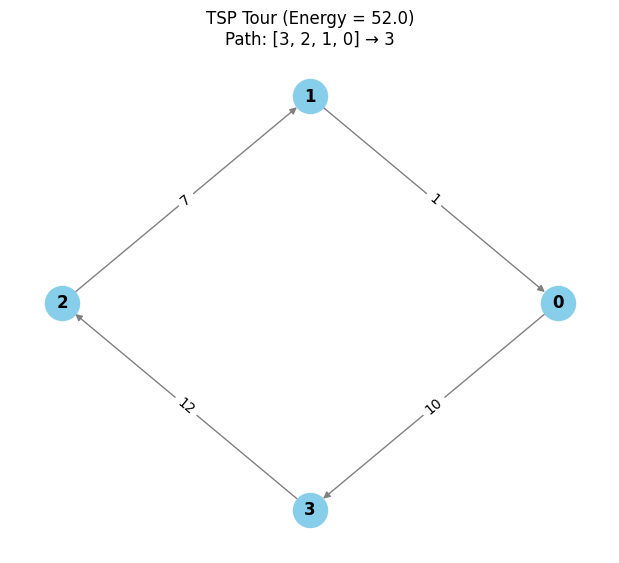

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Example Data ---
n = 4
distance_matrix = np.array([
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
])

best_bitstring = '0001001001001000'  # Example valid TSP solution
best_energy = 52.0

# --- Step 1: Decode the Bitstring ---
def decode_tsp_path(bitstring, n_cities):
    bits = list(map(int, bitstring))
    mat = np.array(bits).reshape((n_cities, n_cities))  # (city, position)
    path = [np.where(mat[:, pos] == 1)[0][0] for pos in range(n_cities)]
    return path

tour = decode_tsp_path(best_bitstring, n)
print("Tour:", tour)

# --- Step 2: Build and Plot the Tour Graph ---
G = nx.DiGraph()
G.add_nodes_from(range(n))

# Add edges in tour order (and loop back to start)
for i in range(len(tour)):
    G.add_edge(tour[i], tour[(i+1) % len(tour)])

# Node positions for better layout
pos = nx.circular_layout(G)

# Draw nodes and tour path
plt.figure(figsize=(6, 5))
nx.draw(G, pos, with_labels=True, node_size=600, node_color='skyblue', font_weight='bold', edge_color='gray', arrows=True)

# Draw edge labels with distances
edge_labels = {}
for i in range(len(tour)):
    u, v = tour[i], tour[(i+1) % len(tour)]
    edge_labels[(u, v)] = distance_matrix[u][v]

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

tour_plain = list(map(int, tour))  # clean numpy types
plt.title(f"TSP Tour (Energy = {best_energy})\nPath: {tour_plain} → {tour_plain[0]}")
plt.axis('off')
plt.show()


In [9]:
import numpy as np

# Step 1: Convert bitstring from {0,1} to {+1,-1}
def bitstring_to_spin(bs):
    return np.array([1 if b == '1' else -1 for b in bs], dtype=int)

# Step 2: Compute J and h from Q
n = Q.shape[0]
J = 0.25 * (Q + Q.T)
h = np.zeros(n)
for k in range(n):
    h[k] = 0.5 * Q[k, k] + 0.25 * sum(Q[k, j] + Q[j, k] for j in range(n) if j != k)

# Step 3: Compare QUBO energy with Ising energy
print("bitstring               QUBO_energy  Ising_energy")
print("--------------------------------------------------")
for bs, qubo_e in energies[:10]:  # Top 10
    z = bitstring_to_spin(bs)
    ising_e = np.dot(h, z) + sum(J[i, j] * z[i] * z[j] for i in range(n) for j in range(i + 1, n)) + const
    print(f"{bs}  {qubo_e:12.2f}  {ising_e:12.2f}")


bitstring               QUBO_energy  Ising_energy
--------------------------------------------------
0001001001001000         52.00         52.00
0001100001000010         52.00         52.00
0010000110000100         52.00         52.00
0010010010000001         52.00         52.00
0100001000011000         52.00         52.00
0100100000010010         52.00         52.00
1000000100100100         52.00         52.00
1000010000100001         52.00         52.00
0001001010000100         62.00         62.00
0001010000101000         62.00         62.00


In [10]:
import numpy as np

def qubo_matrix_to_ising_cost_terms(Q: np.ndarray) -> list:
    """
    Converts a QUBO matrix Q into a list of Ising Hamiltonian terms
    (Z and ZZ Pauli terms) with their coefficients.
    """
    num_qubits = Q.shape[0]
    cost_terms = []

    # ZZ interaction terms
    for k in range(num_qubits):
        for l in range(k + 1, num_qubits):  # Avoid double-counting
            J_kl = 0.25 * (Q[k, l] + Q[l, k])  # Q might not be symmetric
            if J_kl != 0:
                cost_terms.append({
                    'coeff': J_kl,
                    'pauli': 'ZZ',
                    'qubits': [k, l]
                })

    # Z bias terms
    for k in range(num_qubits):
        h_k = 0.5 * Q[k, k]  # Diagonal element
        for j in range(num_qubits):
            if j != k:
                h_k += 0.25 * (Q[k, j] + Q[j, k])
        if h_k != 0:
            cost_terms.append({
                'coeff': h_k,
                'pauli': 'Z',
                'qubits': [k]
            })

    return cost_terms

# Use your TSP QUBO matrix Q
cost_terms = qubo_matrix_to_ising_cost_terms(Q)

# Print the resulting terms
for term in cost_terms:
    print(term)


{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [0, 1]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [0, 2]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [0, 3]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [0, 4]}
{'coeff': np.float64(0.5), 'pauli': 'ZZ', 'qubits': [0, 5]}
{'coeff': np.float64(0.5), 'pauli': 'ZZ', 'qubits': [0, 7]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [0, 8]}
{'coeff': np.float64(7.5), 'pauli': 'ZZ', 'qubits': [0, 9]}
{'coeff': np.float64(7.5), 'pauli': 'ZZ', 'qubits': [0, 11]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [0, 12]}
{'coeff': np.float64(3.0), 'pauli': 'ZZ', 'qubits': [0, 13]}
{'coeff': np.float64(3.0), 'pauli': 'ZZ', 'qubits': [0, 15]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [1, 2]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [1, 3]}
{'coeff': np.float64(0.5), 'pauli': 'ZZ', 'qubits': [1, 4]}
{'coeff': np.float64(1000.0), 'pauli': 'ZZ', 'qubits': [1, 5]}
{'coeff':

In [11]:
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0e6943c77fddddf6734181a66bad0240b38d0cafaa6fdf681bfbdbc8d11cbe36
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


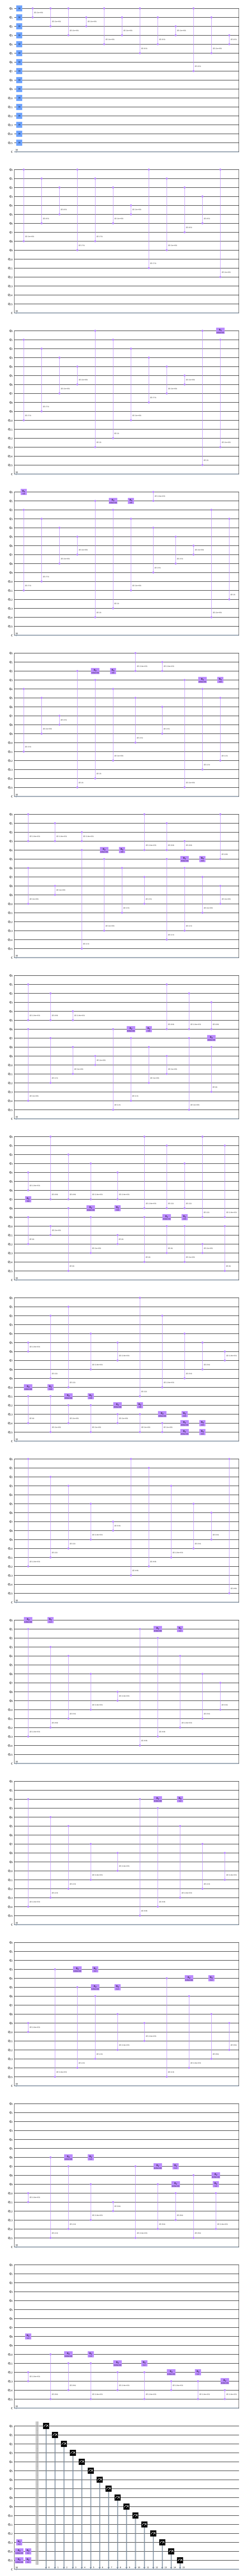

In [12]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Define your QUBO matrix Q (16x16 for 4-city TSP)
Q = np.array([
    [2000., 2000., 2000., 2000., 2000., 1., 0., 1., 2000., 15., 0., 15., 2000., 6., 0., 6.],
    [2000., 2000., 2000., 2000., 1., 2000., 1., 0., 15., 2000., 15., 0., 6., 2000., 6., 0.],
    [2000., 2000., 2000., 2000., 0., 1., 2000., 1., 0., 15., 2000., 15., 0., 6., 2000., 6.],
    [2000., 2000., 2000., 2000., 1., 0., 1., 2000., 15., 0., 15., 2000., 6., 0., 6., 2000.],
    [2000., 1., 0., 1., 2000., 2000., 2000., 2000., 2000., 7., 0., 7., 2000., 3., 0., 3.],
    [1., 2000., 1., 0., 2000., 2000., 2000., 2000., 7., 2000., 7., 0., 3., 2000., 3., 0.],
    [0., 1., 2000., 1., 2000., 2000., 2000., 2000., 0., 7., 2000., 7., 0., 3., 2000., 3.],
    [1., 0., 1., 2000., 2000., 2000., 2000., 2000., 7., 0., 7., 2000., 3., 0., 3., 2000.],
    [2000., 15., 0., 15., 2000., 7., 0., 7., 2000., 2000., 2000., 2000., 2000., 12., 0., 12.],
    [15., 2000., 15., 0., 7., 2000., 7., 0., 2000., 2000., 2000., 2000., 12., 2000., 12., 0.],
    [0., 15., 2000., 15., 0., 7., 2000., 7., 2000., 2000., 2000., 2000., 0., 12., 2000., 12.],
    [15., 0., 15., 2000., 7., 0., 7., 2000., 2000., 2000., 2000., 2000., 12., 0., 12., 2000.],
    [2000., 6., 0., 6., 2000., 3., 0., 3., 2000., 12., 0., 12., 2000., 2000., 2000., 2000.],
    [6., 2000., 6., 0., 3., 2000., 3., 0., 12., 2000., 12., 0., 2000., 2000., 2000., 2000.],
    [0., 6., 2000., 6., 0., 3., 2000., 3., 0., 12., 2000., 12., 2000., 2000., 2000., 2000.],
    [6., 0., 6., 2000., 3., 0., 3., 2000., 12., 0., 12., 2000., 2000., 2000., 2000., 2000.]
]) # <-- insert your Q matrix here from before

n = Q.shape[0]  # 16 qubits for 4-city TSP

# ---- Convert QUBO to Ising cost terms ----
def qubo_matrix_to_ising_cost_terms(Q: np.ndarray) -> list:
    num_qubits = Q.shape[0]
    cost_terms = []
    # ZZ terms
    for k in range(num_qubits):
        for l in range(k + 1, num_qubits):
            J_kl = 0.25 * (Q[k, l] + Q[l, k])
            if J_kl != 0:
                cost_terms.append({'coeff': J_kl, 'pauli': 'ZZ', 'qubits': [k, l]})
    # Z terms
    for k in range(num_qubits):
        h_k = 0.5 * Q[k, k]
        for j in range(num_qubits):
            if j != k:
                h_k += 0.25 * Q[k, j]
        if h_k != 0:
            cost_terms.append({'coeff': h_k, 'pauli': 'Z', 'qubits': [k]})
    return cost_terms

# ---- QAOA Circuit Builder ----
def create_qaoa_circuit(num_qubits: int, cost_terms: list, p: int = 1,
                        add_measurement: bool = True, params: list = None) -> QuantumCircuit:
    if params is None:
        raise ValueError("You must provide a list of parameters for the circuit.")
    qc = QuantumCircuit(num_qubits, num_qubits)
    gammas = [params[i] for i in range(p)]
    betas = [params[i + p] for i in range(p)]

    qc.h(range(num_qubits))  # Initial state: superposition

    for layer in range(p):
        gamma = gammas[layer]
        beta = betas[layer]
        # Cost Hamiltonian
        for term in cost_terms:
            coeff = term['coeff']
            pauli_type = term['pauli']
            qubits = term['qubits']
            if pauli_type == 'Z':
                qc.rz(2 * gamma * coeff, qubits[0])
            elif pauli_type == 'ZZ':
                qc.rzz(2 * gamma * coeff, qubits[0], qubits[1])
        # Mixer Hamiltonian
        for q in range(num_qubits):
            qc.rx(2 * beta, q)

    if add_measurement:
        qc.barrier()
        qc.measure(range(num_qubits), range(num_qubits))

    return qc

# ---- Build and Visualize ----
cost_terms = qubo_matrix_to_ising_cost_terms(Q)
params = [0.5, 0.8, 0.4, 0.6]  # Example: p=2 -> 2 gammas + 2 betas
tsp_qaoa_circuit = create_qaoa_circuit(n, cost_terms, p=2, add_measurement=True, params=params)

# ---- Draw ----
tsp_qaoa_circuit.draw('mpl')


In [16]:
import numpy as np
from qiskit import Aer, QuantumCircuit
from qiskit.utils import algorithm_globals
from scipy.optimize import minimize

# --- Utility Functions ---
def invert_counts(counts):
    return {k[::-1]: v for k, v in counts.items()}

def execute_and_get_counts(qc, backend, shots=10000):
    job = backend.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    return invert_counts(counts)

def bitstring_to_array(bs):
    return np.array([int(b) for b in bs], dtype=int)

def instance_energy(bitstring, Q):
    x = bitstring_to_array(bitstring)
    return x @ Q @ x

def compute_avg_energy(counts, Q):
    total_energy = 0
    total_shots = sum(counts.values())
    for bitstring, count in counts.items():
        energy = instance_energy(bitstring, Q)
        total_energy += energy * count
    return total_energy / total_shots

# --- Cost Terms ---
cost_terms = qubo_matrix_to_ising_cost_terms(Q)

# --- QAOA Parameters ---
p = 2  # You can increase this later
n = len(Q)
backend = Aer.get_backend("qasm_simulator")
algorithm_globals.random_seed = 42

# --- QAOA Circuit Generator ---
def qaoa_objective(theta):
    qc = create_qaoa_circuit(n, cost_terms, p=p, add_measurement=True, params=theta)
    counts = execute_and_get_counts(qc, backend, shots=10000)
    return compute_avg_energy(counts, Q)

# --- Optimization ---
initial_params = np.random.uniform(0, 2 * np.pi, 2 * p)
result = minimize(qaoa_objective, initial_params, method="COBYLA", options={"maxiter": 300, "disp": True})

print("\n Optimization Result:")
print(result)



 Optimization Result:
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 64239.274
       x: [ 2.338e+00  1.371e+00  3.576e+00  6.397e+00]
    nfev: 45
   maxcv: 0.0


In [15]:
import numpy as np
from qiskit import Aer, execute
from qiskit.utils import algorithm_globals
from scipy.optimize import minimize

# --- Utility Functions ---
def invert_counts(counts):
    return {k[::-1]: v for k, v in counts.items()}

def execute_and_get_counts(qc, backend, shots=10000):
    job = backend.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    return invert_counts(counts)

def bitstring_to_array(bs):
    return np.array([int(b) for b in bs], dtype=int)

def instance_energy(bitstring, Q):
    x = bitstring_to_array(bitstring)
    return x @ Q @ x

def compute_avg_energy(counts, Q):
    total_energy = 0
    total_shots = sum(counts.values())
    for bitstring, count in counts.items():
        energy = instance_energy(bitstring, Q)
        total_energy += energy * count
    return total_energy / total_shots

# --- QUBO Matrix ---
# Ensure Q is defined somewhere before this block
# Q = ...  # (16x16 QUBO matrix for 4-city TSP)

# --- Convert QUBO to Ising terms ---
cost_terms = qubo_matrix_to_ising_cost_terms(Q)

# --- QAOA Parameters ---
n = 4                          # Number of cities
num_qubits = n * n            # 16 qubits for 4-city TSP
p = 4                         # QAOA depth
backend = Aer.get_backend("qasm_simulator")
algorithm_globals.random_seed = 42

# --- QAOA Objective Function ---
def qaoa_objective(theta):
    qc = create_qaoa_circuit(num_qubits, cost_terms, p=p, add_measurement=True, params=theta)
    counts = execute_and_get_counts(qc, backend, shots=10000)
    return compute_avg_energy(counts, Q)

# --- Optimization ---
initial_params = np.random.uniform(0, 2 * np.pi, 2 * p)
optimization_result = minimize(qaoa_objective, initial_params, method="COBYLA", options={"maxiter": 300, "disp": True})

print("\n Optimization Result:")
print(optimization_result)

# --- Create QAOA circuit with optimized angles ---
qc = create_qaoa_circuit(num_qubits, cost_terms, p=p, add_measurement=True, params=optimization_result.x)

# --- Run the quantum circuit ---
job = execute(qc, backend=backend, shots=100000)
qaoa_result = job.result()
counts = qaoa_result.get_counts(qc)

# --- Reverse Qiskit bitstrings (Qiskit uses little-endian) ---
reversed_counts = {bs[::-1]: cnt for bs, cnt in counts.items()}

# --- Sort bitstrings by QUBO energy ---
sorted_counts = sorted(reversed_counts.items(), key=lambda x: instance_energy(x[0], Q))

# --- Print top 6 QAOA results ---
print("\n Valid TSP solutions from QAOA:")
valid_solutions = []
total = sum(counts.values())
for bs, cnt in sorted_counts:
    if is_valid_tsp(bs, n):
        energy = instance_energy(bs, Q)
        percentage = cnt / total * 100
        valid_solutions.append((bs, energy, percentage))

# Show only top 6 valid ones
for bs, energy, pct in valid_solutions[:6]:
    print(f"{bs}: energy = {energy:.2f}, count = {pct:.2f}%")

if not valid_solutions:
    print(" No valid TSP tours found. Try increasing penalty or QAOA depth.")


# --- Brute-force to find actual global minimum ---
min_energy = float('inf')
min_bitstring = None
for i in range(2 ** num_qubits):  # 2^16 = 65536
    bs = format(i, f'0{num_qubits}b')
    energy = instance_energy(bs, Q)
    if energy < min_energy:
        min_energy = energy
        min_bitstring = bs

print(f"\n Brute-force minimum: {min_bitstring} with energy = {min_energy:.2f}")



 Optimization Result:
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 61453.924
       x: [ 2.667e+00  5.925e+00  4.164e+00  4.182e+00  1.676e-01
            4.880e+00  2.878e-01  3.302e+00]
    nfev: 86
   maxcv: 0.0

 Valid TSP solutions from QAOA:
0010000110000100: energy = 8052.00, count = 0.01%
1000010000100001: energy = 8052.00, count = 0.00%
0100100000010010: energy = 8052.00, count = 0.01%
1000000100100100: energy = 8052.00, count = 0.00%
0100001000011000: energy = 8052.00, count = 0.00%
0010010010000001: energy = 8052.00, count = 0.00%

 Brute-force minimum: 0000000000000000 with energy = 0.00
